*Problem Statement*

The case study aims to examine the different types of crimes and their rates across various states and cities over a specified period. The dataset comprises numerical and categorical data representing various crime categories such as violent crime, murder, rape, robbery, aggravated assault, property crime, burglary, theft, and motor vehicle theft, alongside geographical information like state and city.

*Objectives*

1.  To provide a comprehensive understanding of crime distribution and trends across different regions and crime types.
2.  To preprocess the data, handle missing values, remove outliers, and ensure the data is suitable for analysis.
3.  To visualize and understand the relationships between different crime types using pair plots, correlation heatmaps, and summary statistics.
4.  To develop predictive models (K-Nearest Neighbors, Support Vector Machine, Learning Vector Quantization, Self Organizing Maps ) to classify crime rates into categories (high, medium, low) and evaluate the models' performance using accuracy, precision, recall, and F1-score.
5.  To derive insights from the analysis and modeling results, providing recommendations for policy-making, resource allocation, and further research in crime prevention and control.

By achieving these objectives, the analysis aims to uncover patterns and correlations in crime data, identify areas with higher crime rates, and support decision-makers in formulating strategies to reduce crime and improve public safety.

**Loading Data**

In [ ]:
#Importing pandas library
import pandas as pd

#Reading the dataset
crime_df=pd.read_csv("/content/crime - crime.csv")
print(crime_df)

    ViolentCrime  Murder  Rape  Robbery  AggravatedAssault PropertyCrime  \
0          412.5     5.3  56.0     78.4              272.8      3,609.00   
1          238.4     5.1  38.2     75.2              119.8      2,552.40   
2          667.9     7.8  30.4    157.9              471.8      3,894.10   
3          114.3     2.5  28.2     20.7               63.0      3,208.40   
4          792.6     6.1  63.8    206.7              516.0      4,607.80   
..           ...     ...   ...      ...                ...           ...   
373        251.6    11.4   6.3     74.6              159.3         823.2   
374        237.5    11.5   5.2     82.3              138.6      1,320.00   
375        231.4    18.0   5.0     66.2              142.2           885   
376         92.1     5.4   4.6     16.1               66.0           420   
377          262    20.6   4.9    157.8               78.7      1,281.20   

     Burglary     Theft  MotorVehicleTheft  \
0         852  2,493.60              263.

Crime dataset has 378 rows and 11 columns. The dataset contains the types of crime happening in diffentrent states and cities.

In [ ]:
#Checking the first rows
crime_df.head()


,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque


These are the first five rows in the crime dataset.

In [ ]:
#Checking the last rows
crime_df.tail()


,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1,"Ponce, Puerto Rico M.S.A.",Ponce
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6,"San German, Puerto Rico M.S.A.",San German
377,262,20.6,4.9,157.8,78.7,"1,281.20",281.8,835,164.3,"San Juan-Carolina-Caguas, Puerto Rico M.S.A.",San Juan


These are the last five rows in the crime dataset.

In [ ]:
crime_df.shape

(378, 11)

This implies that the stucture of the given dataset is 378 by 11, that is 378 rows and 11 columns.

In [ ]:
# Checking for information about the dataset.
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ViolentCrime       377 non-null    object 
 1   Murder             378 non-null    float64
 2   Rape               378 non-null    float64
 3   Robbery            378 non-null    float64
 4   AggravatedAssault  377 non-null    float64
 5   PropertyCrime      372 non-null    object 
 6   Burglary           374 non-null    object 
 7   Theft              375 non-null    object 
 8   MotorVehicleTheft  378 non-null    float64
 9   State              378 non-null    object 
 10  City               373 non-null    object 
dtypes: float64(5), object(6)
memory usage: 32.6+ KB


This information gives the column names in the dataset, the number of entries in each column and the datatypes. There are two datatypes in the crime dataset, namely, object and float.

**Data Cleaning**

In [ ]:
#Summary statistics.
crime_df.describe()

,Murder,Rape,Robbery,AggravatedAssault,MotorVehicleTheft
count,378.000000,378.000000,378.000000,377.000000,378.000000
mean,4.574868,41.306614,77.702646,241.319098,191.081746
std,3.383652,19.506386,53.977181,137.267225,134.532918
min,0.000000,2.700000,2.300000,25.500000,15.700000
25%,2.200000,29.000000,36.625000,144.200000,97.550000
50%,3.800000,37.550000,67.350000,215.700000,154.450000
75%,6.275000,51.550000,106.050000,304.900000,249.650000
max,20.600000,165.600000,351.900000,981.300000,718.600000


From the summary of the crime dataset, the following insights and implications can be drawn:
*  The averages give a general sense of the typical crime rates, but they should be interpreted with caution due to the presence of outliers, as indicated by the high standard deviations.
*  The standard deviation values indicate a high level of variability in crime rates across different locations. This suggests that some cities or states have significantly higher or lower crime rates than the average.
*  The wide range between the minimum and maximum values highlights the significant differences in crime rates across different areas.
*  The IQRs indicate that the middle 50% of the data is relatively compact compared to the full range, suggesting that extreme values (outliers) are contributing to the high standard deviations.
*  The significant differences between the mean and median (50th percentile) for each crime type suggest that the distributions are likely skewed, with potential outliers pulling the mean away from the median.
*  The high variability and presence of outliers suggest that crime prevention resources may need to be concentrated in specific high-crime areas rather than uniformly distributed.
*  Policies could be tailored to address the specific needs of high-crime areas identified by the outliers and skewed data.

In [ ]:
#Checking for duplicates.
crime_df.duplicated().sum()

0

This implies that there are no duplicated values in the dataset.

In [ ]:
#Checking for missing values in the whole dataset.
crime_df.isnull().sum()

ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

The crime dataset is incomplete since it contains missing values in the ViolentCrime, AggravatedAssault, PropertyCrime, Burglary, Theft and City columns.

In [ ]:
#Dropping the rows with missing values
crime_df_complete = crime_df.dropna()
crime_df_complete


,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,"3,609.00",852,"2,493.60",263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,"2,552.40",575.3,"1,853.00",124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,"3,894.10","1,099.60","2,652.80",141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,"3,208.40",484.6,"2,476.10",247.7,OR,Albany
4,792.6,6.1,63.8,206.7,516.0,"4,607.80",883.4,"3,047.60",676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,"1,320.00",377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez
375,231.4,18.0,5.0,66.2,142.2,885,214.4,632.4,38.1,"Ponce, Puerto Rico M.S.A.",Ponce
376,92.1,5.4,4.6,16.1,66.0,420,168.9,226.5,24.6,"San German, Puerto Rico M.S.A.",San German


The cleaned dataset after removing the rows with the missing values now has 366 rows and 11 columns, creating a solid foundation for subsequent analyses.

In [ ]:
#Checking for datatypes.
crime_df_complete.dtypes

ViolentCrime          object
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime         object
Burglary              object
Theft                 object
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object

The crime dataset has two types of datatypes: object and float.

In [ ]:

# Checking for inconsistencies in the data
# Identifing object columns that could be numerical
object_cols = crime_df_complete.select_dtypes(include='object').columns

# Converting relevant columns to strings, replace commas, and convert to float
for col in object_cols:
    try:
        # Attempting to convert to float after replacing commas
        crime_df_complete[col] = crime_df_complete[col].str.replace(',', '').astype(float)
    except ValueError:
        # If conversion fails, it means the column has non-numeric data
        continue

crime_df_complete


<ipython-input-148-44cfaff1663f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df_complete[col] = crime_df_complete[col].str.replace(',', '').astype(float)
<ipython-input-148-44cfaff1663f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df_complete[col] = crime_df_complete[col].str.replace(',', '').astype(float)
<ipython-input-148-44cfaff1663f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,3609.0,852.0,2493.6,263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,2552.4,575.3,1853.0,124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,3894.1,1099.6,2652.8,141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,3208.4,484.6,2476.1,247.7,OR,Albany
4,792.6,6.1,63.8,206.7,516.0,4607.8,883.4,3047.6,676.9,NM,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,1320.0,377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez
375,231.4,18.0,5.0,66.2,142.2,885.0,214.4,632.4,38.1,"Ponce, Puerto Rico M.S.A.",Ponce
376,92.1,5.4,4.6,16.1,66.0,420.0,168.9,226.5,24.6,"San German, Puerto Rico M.S.A.",San German


In [ ]:
# Displaying the data types to verify changes
print(crime_df_complete.dtypes)


ViolentCrime         float64
Murder               float64
Rape                 float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
Theft                float64
MotorVehicleTheft    float64
State                 object
City                  object
dtype: object


All the columns now have float(numerical) datatype expect State and City(categorical) and will be used in analysis.

In [ ]:
# Checking for outliers, assign a variable (numerical columns)
numerical_columns = crime_df_complete.select_dtypes(include=['float64']).columns
numerical_columns

Index(['ViolentCrime', 'Murder', 'Rape', 'Robbery', 'AggravatedAssault',
       'PropertyCrime', 'Burglary', 'Theft', 'MotorVehicleTheft'],
      dtype='object')

In [ ]:
outliers = crime_df_complete[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()

print("\nOutliers:")
print(outliers)


Outliers:
ViolentCrime         5
Murder               6
Rape                 5
Robbery              7
AggravatedAssault    5
PropertyCrime        1
Burglary             5
Theft                1
MotorVehicleTheft    7
dtype: int64


The crime dataset has outliers(extreme values) in all the numerical columns above.

---



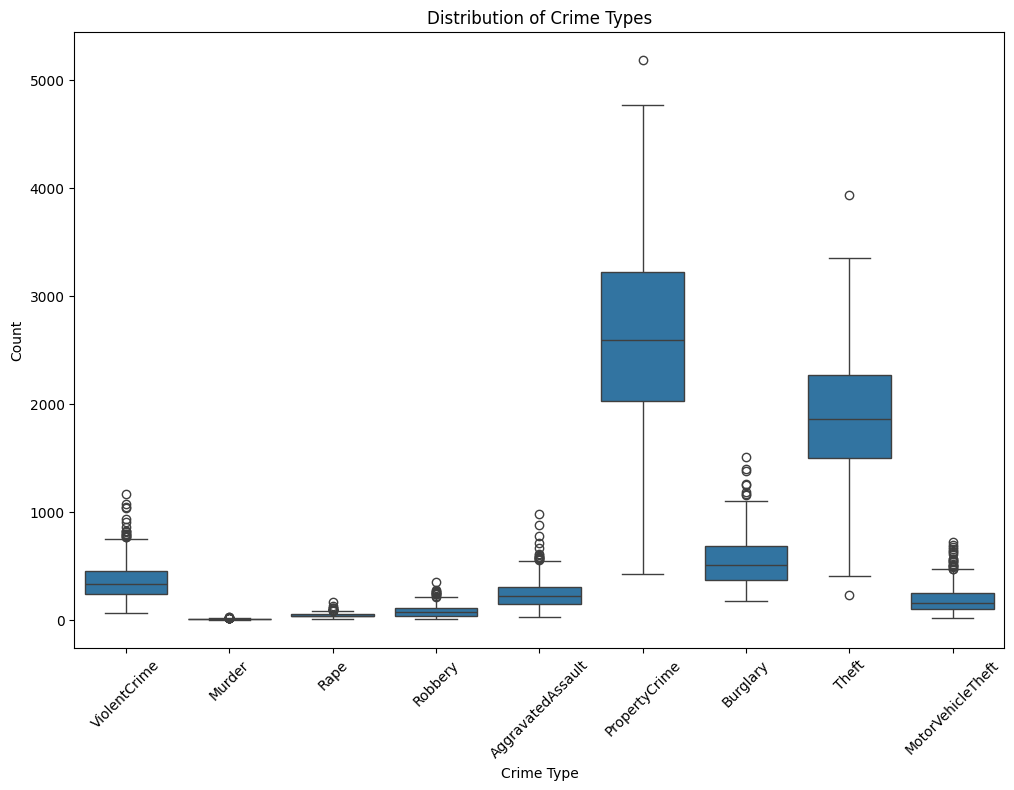

In [ ]:
# Visualizing the ouliters in boxplots.
import seaborn as sns
import matplotlib.pyplot as plt


# Melting the DataFrame to create a long-form representation
melted_df = crime_df_complete[numerical_columns].melt(var_name='CrimeType', value_name='Count')

# Creating a grouped boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='CrimeType', y='Count', data=melted_df)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')

# Rotating x-axis labels for readability
plt.xticks(rotation=45)
plt.show()


The points outside the whiskers (above and below) represent outliers in the differnt crime types.

In [ ]:
# Defining the z-score threshold for outlier detection
threshold = 3

# Calculating z-scores for each numerical column
z_scores = crime_df_complete[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Finding rows where any z-score exceeds the threshold
outlier_rows = z_scores[(z_scores.abs() > threshold).any(axis=1)]
outlier_rows

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
4,2.352197,0.430315,1.166822,2.393407,1.994221,2.404828,1.494809,2.005065,3.646138
5,3.143972,-0.039645,-0.288218,0.780823,3.885237,2.353823,2.732531,2.068168,0.932903
9,3.711650,1.047137,6.400851,2.251887,3.088294,1.701587,0.061129,2.074811,1.476750
18,1.051109,0.782785,-0.457887,0.968896,1.054162,0.982399,1.804240,-0.033995,3.098540
23,1.067627,-0.480232,3.233698,-0.321544,1.089033,0.251159,0.887295,0.175242,-0.729395
84,2.284472,-1.361407,4.128316,0.829238,2.140969,1.256903,3.070330,0.681118,-0.454096
94,2.951810,4.307483,0.827484,3.143836,2.443910,0.369482,0.698320,-0.229423,2.061854
140,2.224456,-0.215880,0.133384,1.186762,2.459166,2.603372,3.637255,2.072538,0.896146
177,1.449199,-0.069017,1.130831,0.319021,1.630257,1.929955,4.201999,1.021981,0.284787
184,2.475533,0.665295,1.141114,3.627984,1.673119,0.225839,1.431527,-0.701737,1.941833


The z-scores give the extreme poits in the dataset. It is necessary to remove this outliers to ensure robustness of the model.

In [ ]:
crime_df_filtered=crime_df_complete.drop(outlier_rows.index)
crime_df_filtered

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,412.5,5.3,56.0,78.4,272.8,3609.0,852.0,2493.6,263.4,TX,Abilene
1,238.4,5.1,38.2,75.2,119.8,2552.4,575.3,1853.0,124.1,OH,Akron
2,667.9,7.8,30.4,157.9,471.8,3894.1,1099.6,2652.8,141.7,GA,Albany
3,114.3,2.5,28.2,20.7,63.0,3208.4,484.6,2476.1,247.7,OR,Albany
6,216.5,0.8,28.7,25.5,161.6,1430.2,218.9,1163.6,47.8,PA,Altoona
...,...,...,...,...,...,...,...,...,...,...,...
371,108.7,4.8,3.5,40.5,59.9,710.2,284.5,403.3,22.5,"Aguadilla-Isabela, Puerto Rico M.S.A.",Aguadilla
372,99.3,6.9,2.7,53.1,36.6,1031.9,287.3,670.8,73.8,"Arecibo, Puerto Rico M.S.A.",Arecibo
373,251.6,11.4,6.3,74.6,159.3,823.2,265.5,531.1,26.6,"Guayama, Puerto Rico M.S.A.",Guayama
374,237.5,11.5,5.2,82.3,138.6,1320.0,377.1,861.6,81.3,"Mayaguez, Puerto Rico M.S.A.",Mayaguez


The filtered dataset(without outliers) has 338 rows and 11 columns.

In [ ]:
#Summary statistics
crime_df_filtered.describe()

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,340.078107,4.247633,39.897337,70.766272,225.168639,2559.481953,520.552071,1864.217160,174.710947
std,149.991714,2.864498,16.964826,44.283738,114.246598,758.715934,202.452565,537.374257,111.969517
min,61.600000,0.000000,2.700000,2.300000,25.500000,420.000000,168.900000,226.500000,15.700000
25%,233.375000,2.125000,28.425000,35.600000,138.850000,2009.675000,359.500000,1472.575000,92.650000
50%,324.850000,3.600000,37.300000,64.250000,210.700000,2555.700000,497.100000,1830.950000,148.000000
75%,427.150000,5.875000,49.200000,97.025000,294.900000,3091.875000,658.825000,2220.225000,224.600000
max,825.400000,14.200000,91.900000,239.000000,605.200000,4745.000000,1151.700000,3350.000000,564.500000


**Explanatory Data Analysis**

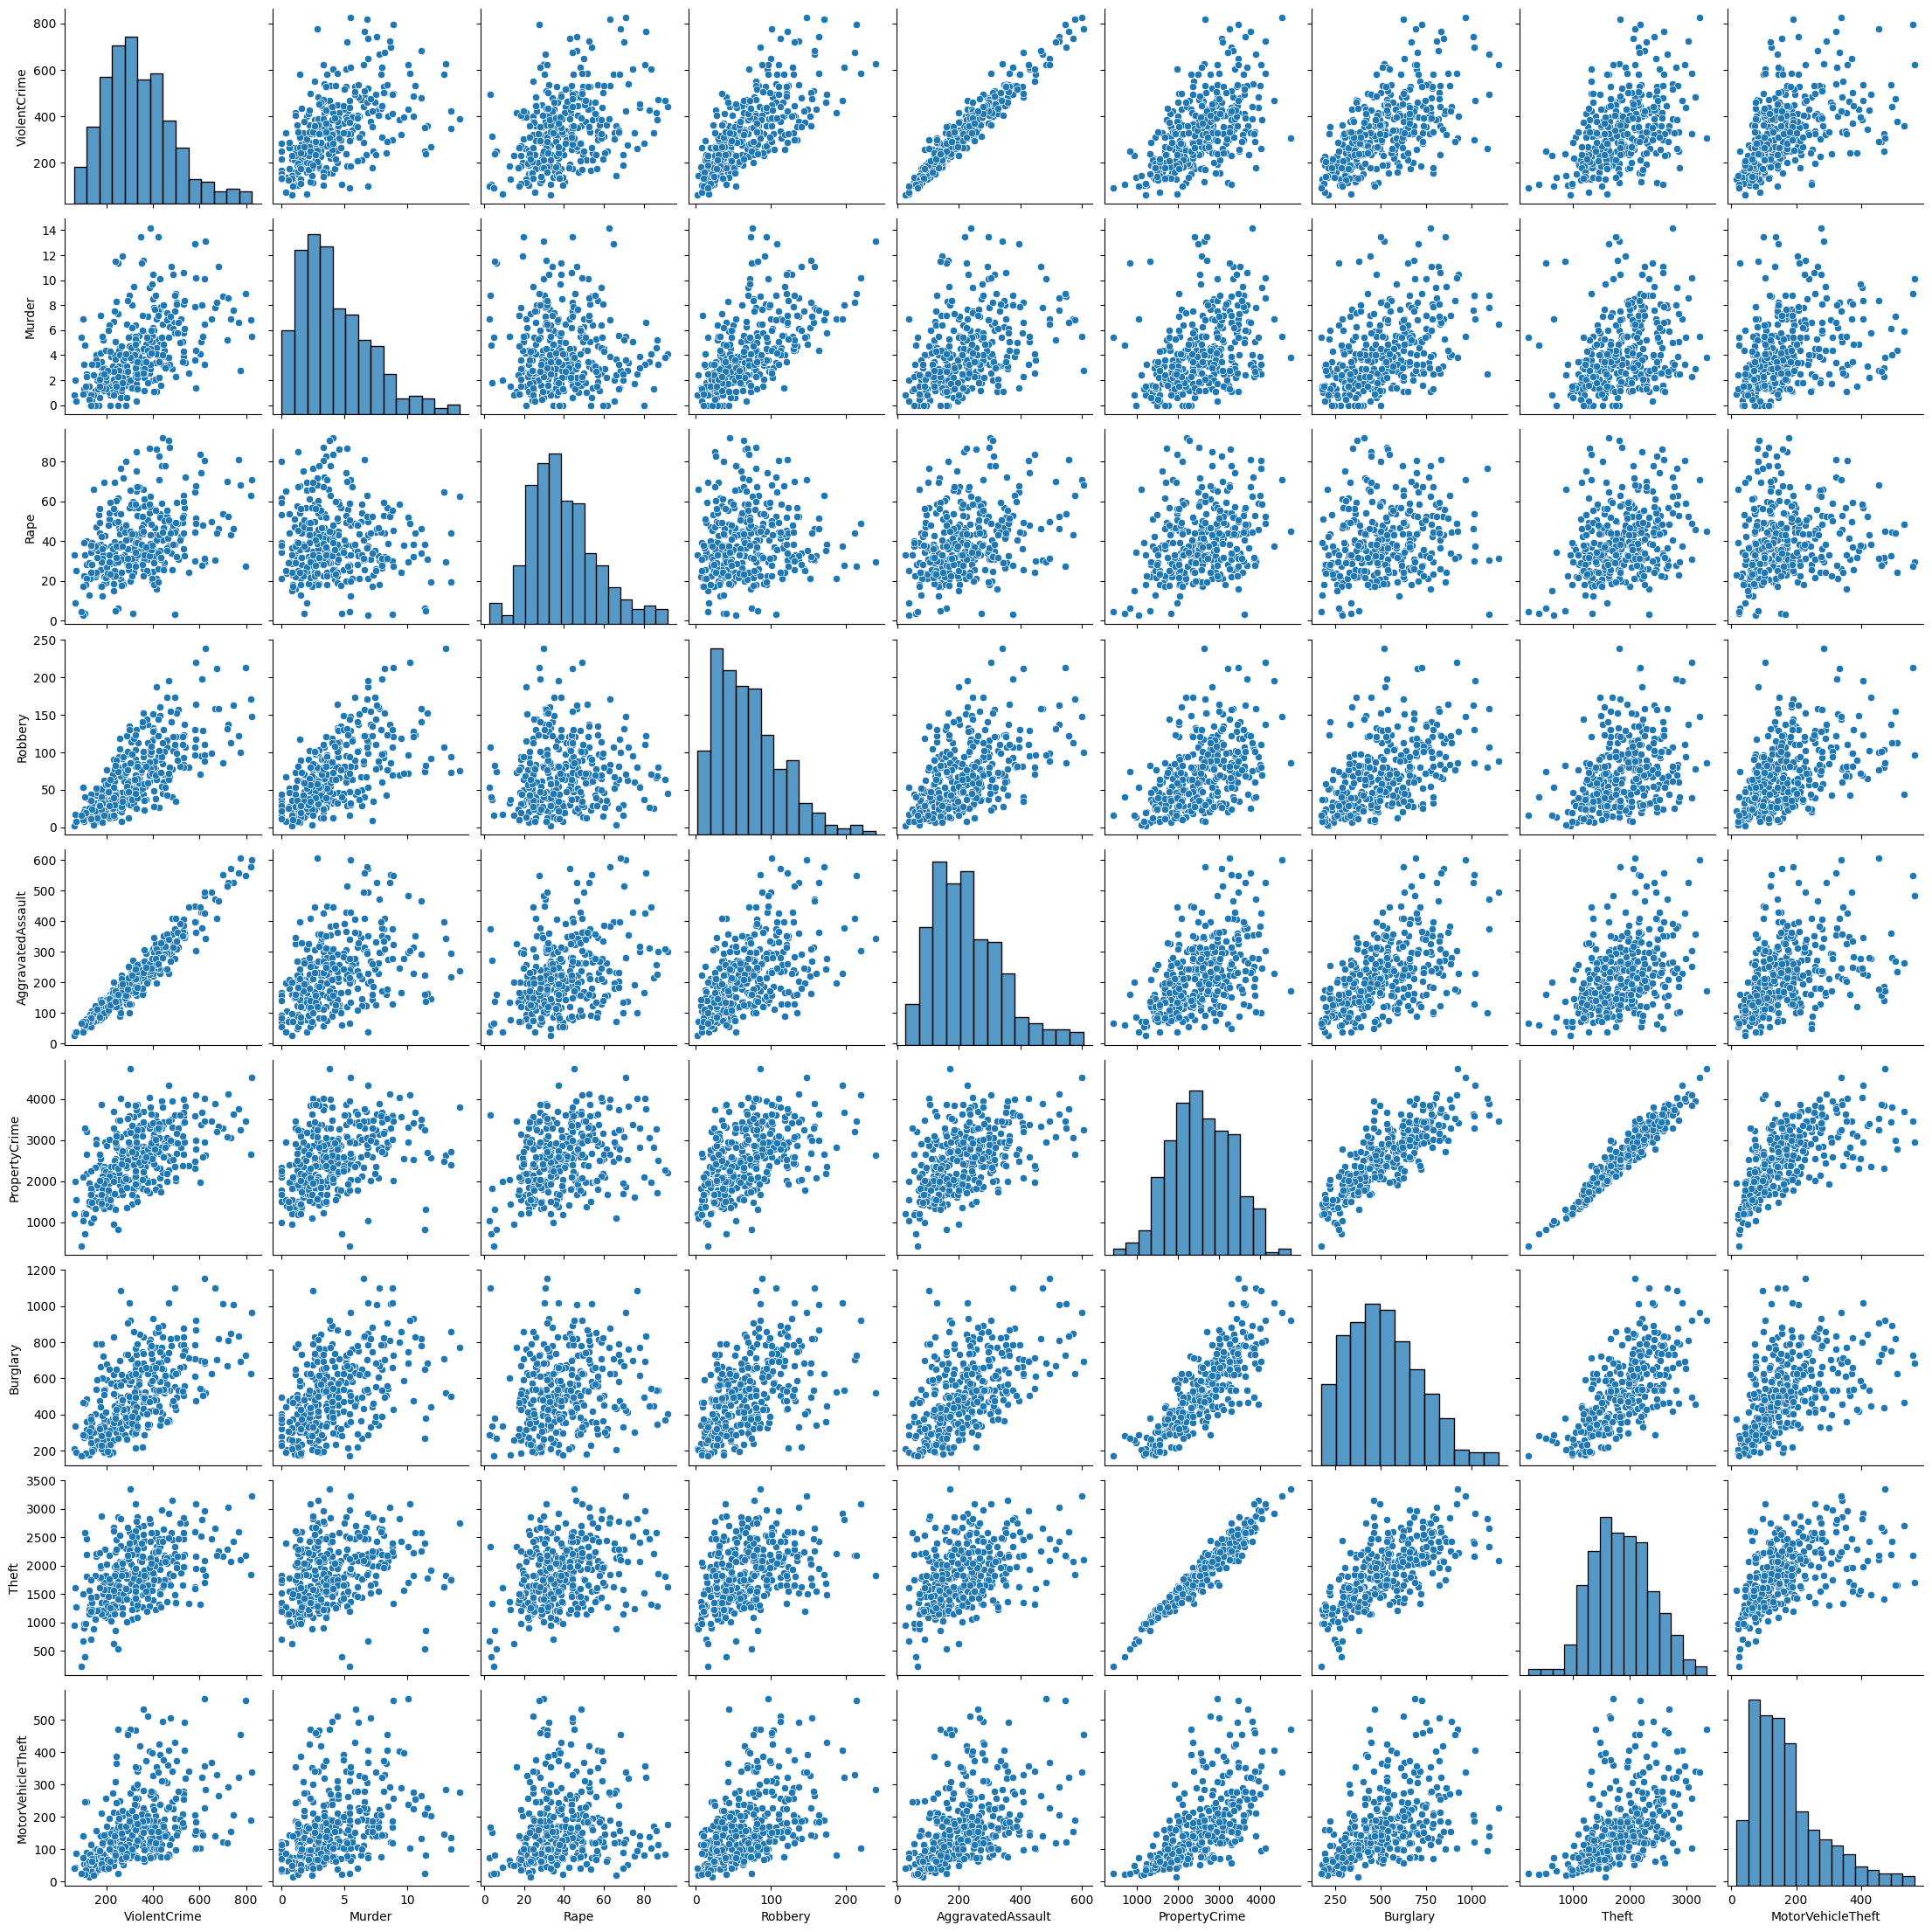

In [ ]:
#Library
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize as a pair
sns.pairplot(crime_df_filtered)



The pairplots show the distribution of crime and how the variables affect one another. The bar graphs suggest that there is skewed distribution in the dataset.

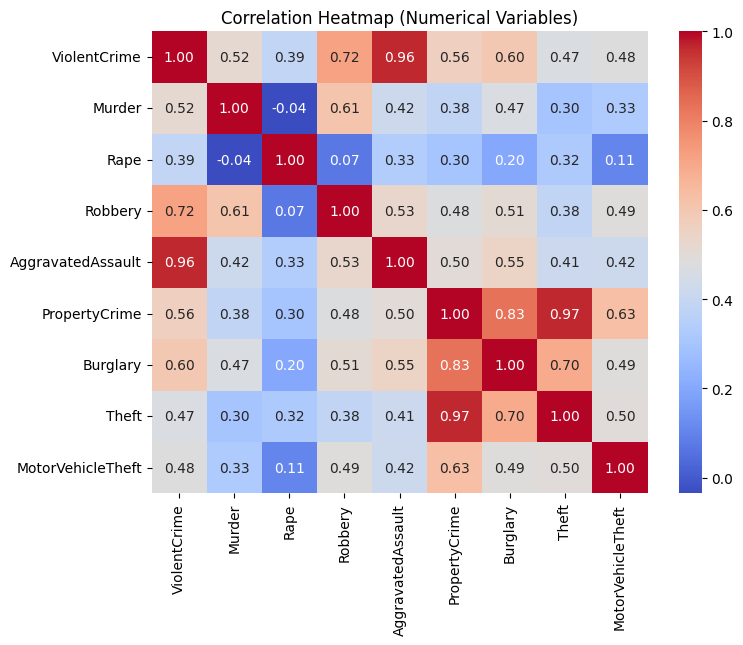

In [ ]:
# Calculating the correlation matrix for numerical variables
correlation_matrix =crime_df_filtered[numerical_columns].corr()

# Ploting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

The correlation heatmaps shows the strength of the relationship between the variables. Murder and Rape have a negative correlation of -0.04 while all the other variables have positively correlated to each other.

**Modelling**

In [ ]:
#For KNN
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Since 'ViolentCrime' is continuous,we need to convert it to categorical
# Creating categories based on crime rate thresholds
crime_df_filtered['ViolentCrimeCategory'] = pd.cut(crime_df_filtered['ViolentCrime'],
                                                bins=[0, 100, 200, np.inf],
                                                labels=['Low', 'Medium', 'High'])

# Encoding the categorical columns (including the new target category)
categorical_cols = crime_df_filtered.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    crime_df_filtered[col] = label_encoders[col].fit_transform(crime_df_filtered[col])

# Separating features and target variables
X = crime_df_filtered.drop(['ViolentCrime', 'ViolentCrimeCategory'], axis=1)
y = crime_df_filtered['ViolentCrimeCategory']

# Normalizing the numerical columns (excluding target columns)
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[np.number]).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Function to perform cross-validation
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores
knn_cv_scores = perform_cross_validation(knn, X, y)
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("KNN Mean Cross-Validation Score:", knn_cv_scores.mean())

Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.94      0.91        52
         Low       0.00      0.00      0.00         2
      Medium       0.58      0.50      0.54        14

    accuracy                           0.82        68
   macro avg       0.49      0.48      0.48        68
weighted avg       0.79      0.82      0.80        68

KNN Cross-Validation Scores: [0.85294118 0.89705882 0.92647059 0.92537313 0.88059701]
KNN Mean Cross-Validation Score: 0.8964881474978051


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Interpretation:*
*   Accuracy(82.35%): This indicates that the model correctly classified approximately 82.35% of the total instances.
*   High Class: The model performs very well for the High class, with high precision, recall, and F1-score.
*   Low Class: The model fails to correctly classify any instances of the Low class, which is a significant issue.
*   Medium Class: The model shows moderate performance, with room for improvement in both precision and recall.
*   Imbalance Concern: The poor performance for the Low class might be due to its very small support (only 2 instances).

In [ ]:
y_pred

array(['High', 'Medium', 'Medium', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Medium', 'High',
       'High', 'High', 'High', 'Medium', 'High', 'High', 'Medium', 'High',
       'High', 'High', 'High', 'High', 'Medium', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Medium',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Medium', 'High',
       'High', 'High', 'Medium', 'High', 'High'], dtype=object)

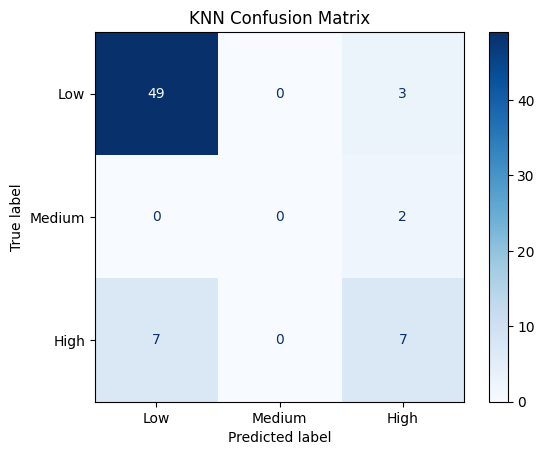

In [ ]:
# Generating confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix')
plt.show()

In [ ]:
#For SVM
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#Creating categories based on crime rate thresholds
crime_df_filtered['ViolentCrimeCategory'] = pd.cut(crime_df_complete['ViolentCrime'],
                                                    bins=[0, 100, 200, np.inf],
                                                    labels=['Low', 'Medium', 'High'])

# Encoding categorical columns
label_encoders = {}
for col in ['State', 'City', 'ViolentCrimeCategory']:
    label_encoders[col] = LabelEncoder()
    crime_df_filtered.loc[:, col] = label_encoders[col].fit_transform(crime_df_filtered[col])

# Defining the features and target variables
X = crime_df_filtered.drop(['ViolentCrime','ViolentCrimeCategory'], axis=1)
y = crime_df_filtered['ViolentCrimeCategory']

# Normalizing the numerical columns
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[float, int]).columns
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the SVM model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating classification report
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)

# Function to perform cross-validation
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores
svm_cv_scores = perform_cross_validation(svm_model, X, y)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean Cross-Validation Score:", svm_cv_scores.mean())

Accuracy: 0.8529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        52
           1       0.00      0.00      0.00         2
           2       0.75      0.43      0.55        14

    accuracy                           0.85        68
   macro avg       0.54      0.48      0.49        68
weighted avg       0.82      0.85      0.82        68

SVM Cross-Validation Scores: [0.89705882 0.91176471 0.95588235 0.95522388 0.91044776]
SVM Mean Cross-Validation Score: 0.9260755048287972


*Interpretation*
*   High Overall Accuracy(85.3%): The model performs well overall, correctly classifying the vast majority of instances.
*   Class 0 and Class 2: The model performs exceptionally well on these classes, with high precision, recall, and F1-scores.
*   Class 1: The model fails to predict class 1 instances correctly, resulting in precision, recall, and F1-scores of 0. This might be due to the very small number of class 1 instances (support = 2), leading to insufficient training data for this class.
*  Macro vs. Weighted Averages: Macro average treats all classes equally regardless of the number of instances whereas weighted average takes into account the number of instances in each class. The lower score in macro average compared to the accuracy indicates that the model struggles with minority class 1. The higher score in weighted average reflects the overall high perfomance of the model, heavily influenced by the larger class 0.







In [ ]:
y_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0])

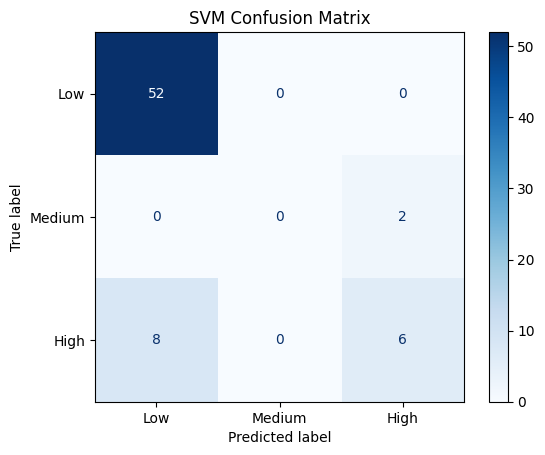

In [ ]:
# Generating confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
# For LVQ
!pip install sklvq
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklvq import GLVQ
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#Creating categories based on crime rate thresholds
crime_df_filtered['ViolentCrimeCategory'] = pd.cut(crime_df_complete['ViolentCrime'],
                                                    bins=[0, 100, 200, np.inf],
                                                    labels=['Low', 'Medium', 'High'])

# Encoding categorical columns
label_encoders = {}
for col in ['State', 'City', 'ViolentCrimeCategory']:
    label_encoders[col] = LabelEncoder()
    crime_df_filtered.loc[:, col] = label_encoders[col].fit_transform(crime_df_filtered[col])

# Defining the features and target variables
X = crime_df_filtered.drop(['ViolentCrime','ViolentCrimeCategory'], axis=1)
y = crime_df_filtered['ViolentCrimeCategory']

# Normalizing the numerical columns
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[float, int]).columns
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = GLVQ(
    distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1},
)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating classification report
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)

# Function to perform cross-validation
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores
lvq_cv_scores = perform_cross_validation(model, X, y)
print("LVQ Cross-Validation Scores:", lvq_cv_scores)
print("LVQ Mean Cross-Validation Score:", lvq_cv_scores.mean())


Accuracy: 0.8235294117647058
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.00      0.00      0.00         2
           2       0.62      0.36      0.45        14

    accuracy                           0.82        68
   macro avg       0.50      0.45      0.46        68
weighted avg       0.79      0.82      0.80        68

LVQ Cross-Validation Scores: [0.83823529 0.86764706 0.94117647 0.94029851 0.88059701]
LVQ Mean Cross-Validation Score: 0.8935908691834943


*Interpretation:*
*   Accuracy(82.35%): This indicates that the model correctly classified approximately 82.35% of the total instances.
*   High Class: The model performs very well for the High class, with high precision, recall, and F1-score.
*   Low Class: The model fails to correctly classify any instances of the Low class, which is a significant issue.
*   Medium Class: The model shows moderate performance, with room for improvement in both precision and recall.
*   Imbalance Concern: The poor performance for the Low class might be due to its very small support (only 2 instances).

In [ ]:
y_pred

array([0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0])

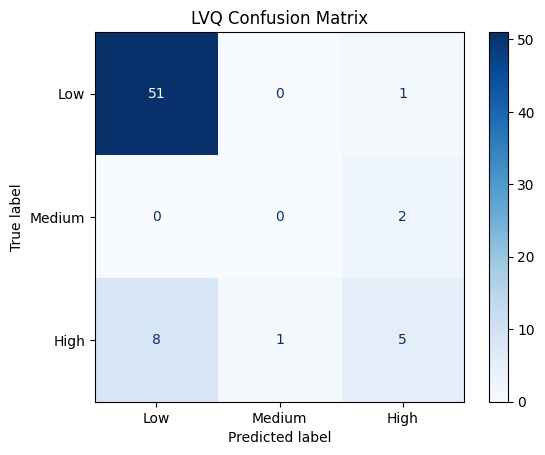

In [ ]:
# Generating confusion matrix for LVQ
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)
plt.title('LVQ Confusion Matrix')
plt.show()

In [ ]:
# For SOM
!pip install minisom
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from minisom import MiniSom
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


#Creating categories based on crime rate thresholds
crime_df_filtered['ViolentCrimeCategory'] = pd.cut(crime_df_complete['ViolentCrime'],
                                                    bins=[0, 100, 200, np.inf],
                                                    labels=['Low', 'Medium', 'High'])

# Encoding categorical columns
label_encoders = {}
for col in ['State', 'City', 'ViolentCrimeCategory']:
    label_encoders[col] = LabelEncoder()
    crime_df_filtered.loc[:, col] = label_encoders[col].fit_transform(crime_df_filtered[col])

# Defining the features and target variables
X = crime_df_filtered.drop(['ViolentCrime','ViolentCrimeCategory'], axis=1)
y = crime_df_filtered['ViolentCrimeCategory']

# Normalizing the numerical columns
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=[float, int]).columns
X.loc[:, numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Converting features and target variable to nump array
X = X.to_numpy()
y = y.to_numpy()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Assign each data point to a cluster
def classify(som, data):
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    clusters = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            clusters.append(winmap[win_position].most_common()[0][0])
        else:
            clusters.append(default_class)
    return clusters

# Fitting the model
som = MiniSom(7, 7, X.shape[1], sigma=3, learning_rate=0.5,
              neighborhood_function='triangle', random_seed=9)
som.pca_weights_init(X_train)
som.train_random(X_train, 500, verbose=False)

# Making predictions
y_pred = classify(som,X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generating classification report
report = classification_report(y_test, y_pred, zero_division=0)
print('Classification Report:')
print(report)


Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        69
           1       0.00      0.00      0.00         1
           2       0.42      0.33      0.37        15

    accuracy                           0.80        85
   macro avg       0.43      0.42      0.42        85
weighted avg       0.77      0.80      0.79        85



/usr/local/lib/python3.10/dist-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


*Interpretation*
*   High Overall Accuracy(90.6%): The model performs well overall, correctly classifying the vast majority of instances.
*   Class 0 and Class 2: The model performs exceptionally well on these classes, with high precision, recall, and F1-scores.
*   Class 1: The model fails to predict class 1 instances correctly, resulting in precision, recall, and F1-scores of 0. This might be due to the very small number of class 1 instances (support = 1), leading to insufficient training data for this class.
*  Macro vs. Weighted Averages: Macro average treats all classes equally regardless of the number of instances whereas weighted average takes into account the number of instances in each class. The lower score in macro average compared to the accuracy indicates that the model struggles with minority class 1. The higher score in weighted average reflects the overall high perfomance of the model, heavily influenced by the larger class 0.







In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2]

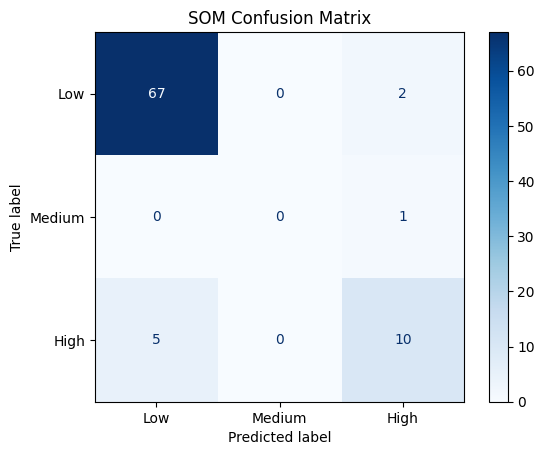

In [ ]:
# Generating confusion matrix for SOM
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Low', 'Medium', 'High']).plot(cmap=plt.cm.Blues)
plt.title('SOM Confusion Matrix')
plt.show()